In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',10)
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [4]:
print(df.info())
print(df['InvoiceDate'].max())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
9/9/2011 9:52


In [5]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

5268
0


In [6]:
df['Short_Description'] = df['Description'].str.slice(0,13)

df['Revenue'] = df['Quantity'] * df['UnitPrice']
df = df.dropna(subset=['CustomerID'])
df = df[df['Revenue'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)
aov = df.groupby('InvoiceNo')['Revenue'].sum().mean().round(2)
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100
monthly_revenue = df.set_index('InvoiceDate').resample('M')['Revenue'].sum().round(2)




print(monthly_revenue)
print(repeat_customers.count())
print(repeat_customers[repeat_customers > 1].count())
print(repeat_rate.round(2))
print(df.info())


C:\Users\hi\AppData\Local\Temp\ipykernel_12876\510549076.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('InvoiceDate').resample('M')['Revenue'].sum().round(2)


InvoiceDate
2010-12-31     570422.73
2011-01-31     568101.31
2011-02-28     446084.92
2011-03-31     594081.76
2011-04-30     468374.33
2011-05-31     677355.15
2011-06-30     660046.05
2011-07-31     598962.90
2011-08-31     644051.04
2011-09-30     950690.20
2011-10-31    1035642.45
2011-11-30    1156205.61
2011-12-31     517190.44
Freq: ME, Name: Revenue, dtype: float64
4338
2845
65.58
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          392692 non-null  object        
 1   StockCode          392692 non-null  object        
 2   Description        392692 non-null  object        
 3   Quantity           392692 non-null  int64         
 4   InvoiceDate        392692 non-null  datetime64[ns]
 5   UnitPrice          392692 non-null  float64       
 6   CustomerID         392692 non-null  object      

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

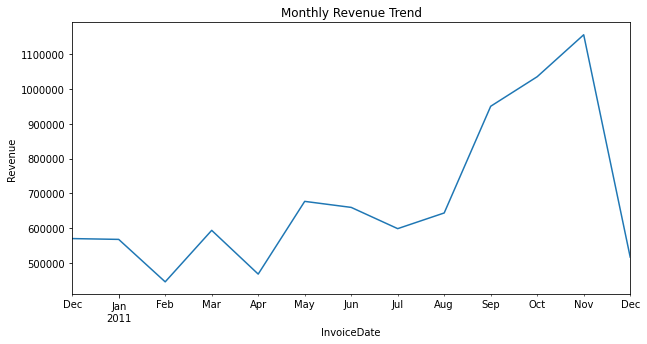

In [30]:
plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.ticklabel_format(style='plain', axis='y')
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.show()

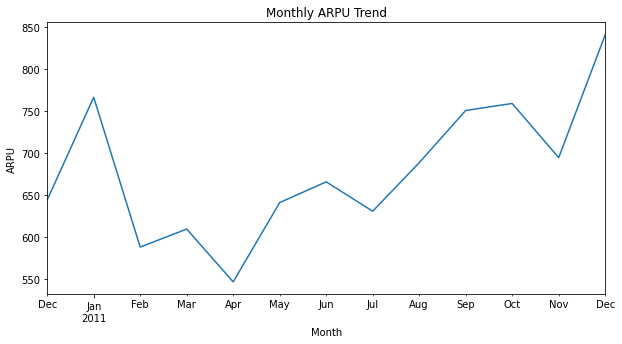

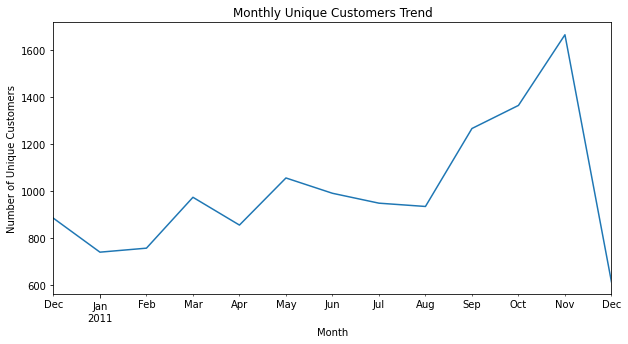

In [8]:
# --- 1. Persiapan Data (Asumsi DataFrame 'df' sudah ada) ---
# Ubah format tanggal menjadi bulan dan tahun
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')



# Kelompokkan data dan hitung metrik bulanan
monthly_metrics = df.groupby('InvoiceMonth').agg(
    total_revenue=('Revenue', 'sum'),
    unique_customers=('CustomerID', 'nunique')
)


# Hitung ARPU
monthly_metrics['ARPU'] = monthly_metrics['total_revenue'] / monthly_metrics['unique_customers']

# --- 2. Analisis ARPU dan Pelanggan Unik ---
#print("Metrik bulanan:")
#print(monthly_metrics[['ARPU', 'unique_customers']])

# --- 3. Membuat Grafik untuk Analisis ---
# Grafik 1: Tren ARPU
monthly_metrics['ARPU'].plot(kind='line', figsize=(10, 5))
plt.title('Monthly ARPU Trend')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.show()

# Grafik 2: Tren Jumlah Pelanggan Unik
monthly_metrics['unique_customers'].plot(kind='line', figsize=(10, 5))
plt.title('Monthly Unique Customers Trend')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()

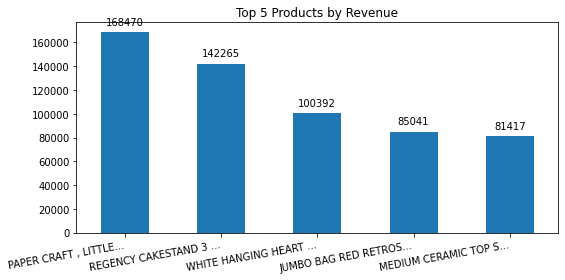

In [9]:
top_products = df.groupby('Description')['Revenue'].sum().nlargest(5)

new_labels = []

# 2. Mulai looping pada setiap label di indeks 'top_products'
for label in top_products.index:
    # 3. Periksa apakah label terlalu panjang (lebih dari 20 karakter)
    if len(label) > 20:
        # Jika ya, potong label dan tambahkan "..."
        short_label = label[:20] + '...'
    else:
        # Jika tidak, biarkan label apa adanya
        short_label = label
    
    # 4. Tambahkan label yang sudah diproses ke list baru
    new_labels.append(short_label)

# 5. Ganti indeks lama dengan list label yang sudah diperbarui
top_products.index = new_labels

#print("--- Indeks SETELAH dipotong ---")
#print(top_products.index)
ax = top_products.plot(kind='bar', figsize=(8,4))
plt.title("Top 5 Products by Revenue")
plt.xticks(rotation=10, ha='right')

#print(top_products)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points'
                )
    
plt.tight_layout()
plt.show()



C:\Users\hi\AppData\Local\Temp\ipykernel_12876\2965442160.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Revenue']


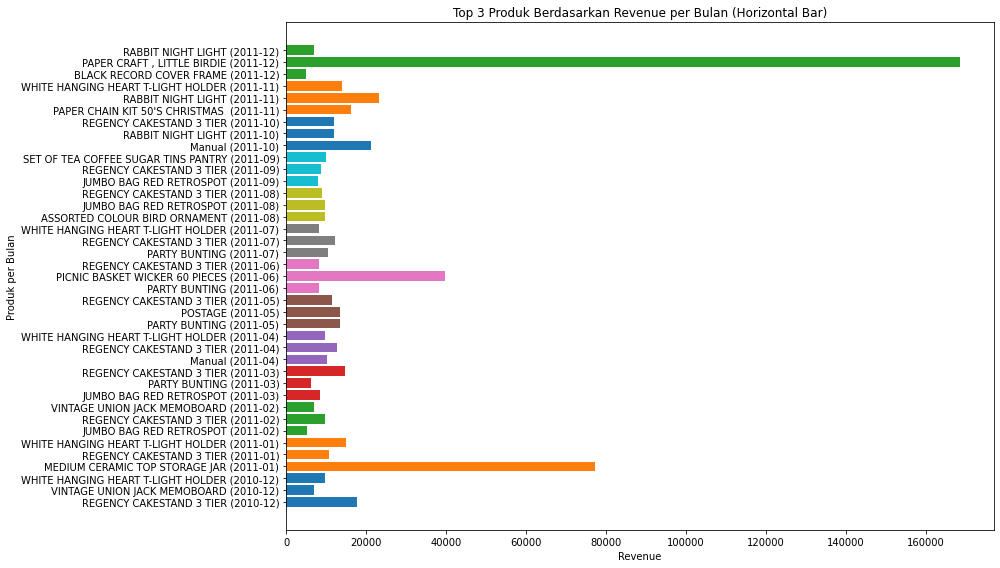

In [37]:

# Pastikan date bertipe datetime
copy = df[['Description',"InvoiceDate","Revenue"]].copy()
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])

# Set index ke InvoiceDate untuk resample
copy = copy.set_index('InvoiceDate')

# Hitung total revenue per produk per bulan
topproductbulan = (
    copy.groupby('Description')
        .resample('M')['Revenue']
        .sum()
        .reset_index()
)

# Ranking per bulan (top 3)
topproductbulan['rank'] = (
    topproductbulan.groupby(topproductbulan['InvoiceDate'].dt.to_period('M'))['Revenue']
    .rank(ascending=False, method='first')
)

top3 = topproductbulan[topproductbulan['rank'] <= 3]

# Plot horizontal
plt.figure(figsize=(14, 8))

for month, subset in top3.groupby(top3['InvoiceDate'].dt.to_period('M')):
    plt.barh(
        subset['Description'] + f" ({month})",
        subset['Revenue']
    )

plt.ylabel("Produk per Bulan")
plt.xlabel("Revenue")
plt.title("Top 3 Produk Berdasarkan Revenue per Bulan (Horizontal Bar)")
plt.tight_layout()
plt.show()


InvoiceMonth  InvoiceMonth  Description                       
2010-12       2010-12       REGENCY CAKESTAND 3 TIER               17581.50
                            WHITE HANGING HEART T-LIGHT HOLDER      9602.05
                            VINTAGE UNION JACK MEMOBOARD            6938.49
                            WOOD BLACK BOARD ANT WHITE FINISH       6685.23
                            BLACK RECORD COVER FRAME                6248.82
                                                                    ...    
2011-12       2011-12       PAPER CRAFT , LITTLE BIRDIE           168469.60
                            RABBIT NIGHT LIGHT                      6875.20
                            BLACK RECORD COVER FRAME                4988.27
                            REGENCY CAKESTAND 3 TIER                4532.28
                            METAL SIGN TAKE IT OR LEAVE IT          3996.70
Name: Revenue, Length: 65, dtype: float64


<Figure size 720x360 with 0 Axes>

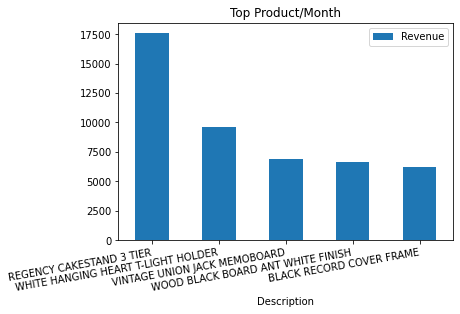

In [10]:
top_product_per_month = df[['InvoiceDate','Description','Revenue']].copy()
top_product_per_month['InvoiceMonth'] = top_product_per_month['InvoiceDate'].dt.to_period('M')

top_product_per_month = top_product_per_month.groupby(['InvoiceMonth','Description'])['Revenue'].sum()
 
top_product_per_month = top_product_per_month.groupby(level=0).nlargest(5)
print(top_product_per_month)


plt.figure(figsize=(10,5))
top_product_per_month['2010-12'].reset_index(level=0).plot(kind = 'bar')
plt.title('Top Product/Month')
plt.xticks(rotation=10, ha='right')
plt.show()

PAPER CRAFT , LITTLE BIRDIE
InvoiceDate
2011-12-31    168469.6
Freq: ME, Name: Revenue, dtype: float64
DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30',
               '2011-12-31'],
              dtype='datetime64[ns]', freq='ME')


C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:8: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_top1 = data_top1.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)
C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_year = pd.date_range(start='2010-12-01', end='2012-01-09', freq='M')


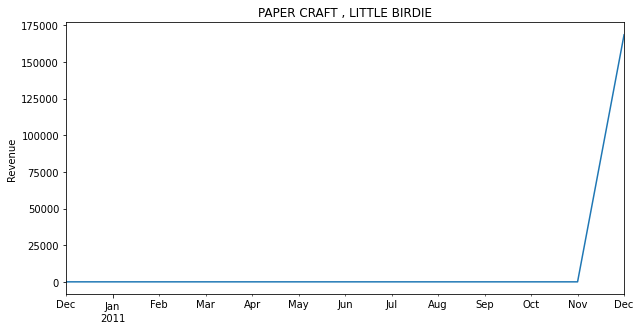

C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:26: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_top2 = data_top2.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)


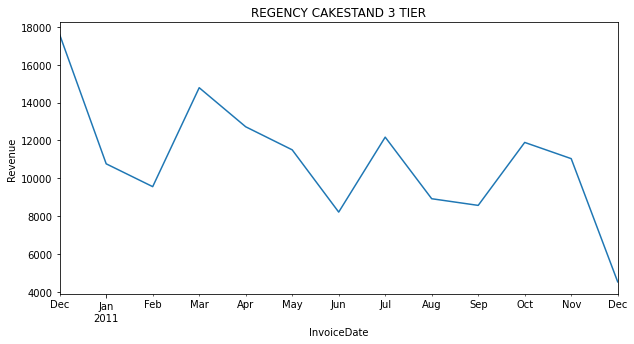

C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:35: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_top3 = data_top3.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)


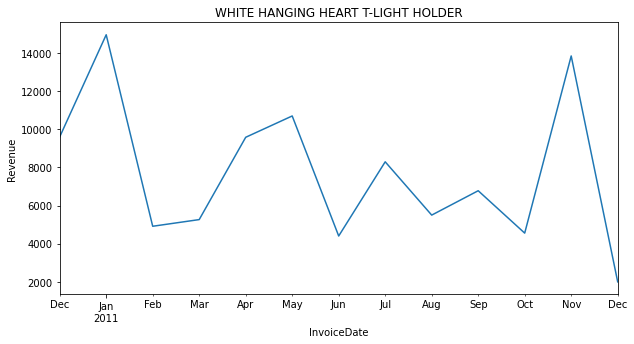

C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:44: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_top4 = data_top4.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)


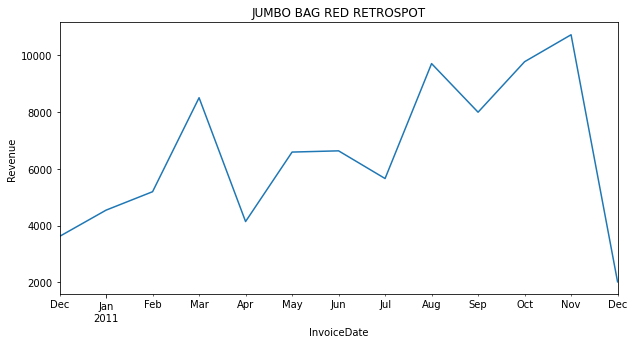

C:\Users\hi\AppData\Local\Temp\ipykernel_12876\3124203628.py:53: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_top5= data_top5.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)


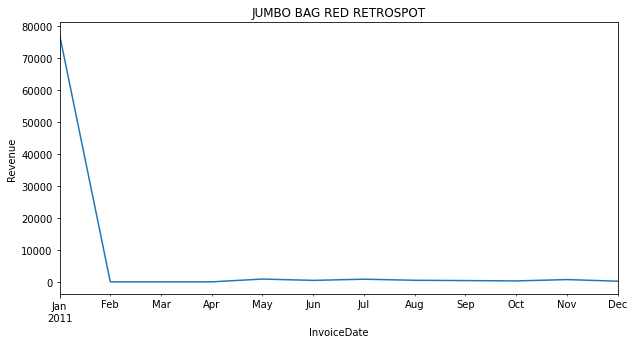

In [11]:
list_top_5_product = df.groupby('Description')['Revenue'].sum().nlargest(5).index.tolist()

data_full_5_products = df[df['Description'].isin(list_top_5_product)]



data_top1 = data_full_5_products[data_full_5_products['Description'] == list_top_5_product[0]]
tren_top1 = data_top1.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)

print(list_top_5_product[0])
print(tren_top1)

full_year = pd.date_range(start='2010-12-01', end='2012-01-09', freq='M')
tren_lengkap_nan = tren_top1.reindex(full_year)
tren_lengkap_nan = tren_lengkap_nan.fillna(0)

print(tren_lengkap_nan.index)

plt.figure(figsize=(10,5))
tren_lengkap_nan.plot(kind='line')
plt.title(f'{list_top_5_product[0]}')
plt.ylabel("Revenue")
plt.show()

data_top2 = data_full_5_products[data_full_5_products['Description'] == list_top_5_product[1]]
tren_top2 = data_top2.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)

plt.figure(figsize=(10,5))
tren_top2.plot(kind='line')
plt.title(f'{list_top_5_product[1]}')
plt.ylabel("Revenue")
plt.show()

data_top3 = data_full_5_products[data_full_5_products['Description'] == list_top_5_product[2]]
tren_top3 = data_top3.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)

plt.figure(figsize=(10,5))
tren_top3.plot(kind='line')
plt.title(f'{list_top_5_product[2]}')
plt.ylabel("Revenue")
plt.show()

data_top4 = data_full_5_products[data_full_5_products['Description'] == list_top_5_product[3]]
tren_top4 = data_top4.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)

plt.figure(figsize=(10,5))
tren_top4.plot(kind='line')
plt.title(f'{list_top_5_product[3]}')
plt.ylabel("Revenue")
plt.show()

data_top5= data_full_5_products[data_full_5_products['Description'] == list_top_5_product[4]]
tren_top5= data_top5.set_index('InvoiceDate').resample('m')['Revenue'].sum().round(2)

plt.figure(figsize=(10,5))
tren_top5.plot(kind='line')
plt.title(f'{list_top_5_product[3]}')
plt.ylabel("Revenue")
plt.show()






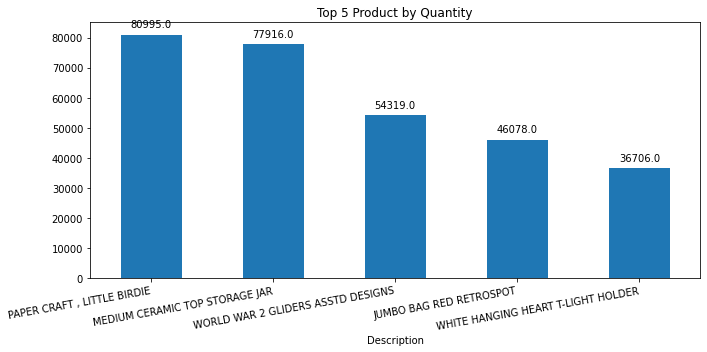

In [12]:
top_product_by_quantity = df.groupby('Description')['Quantity'].sum().nlargest(5)
ax = top_product_by_quantity.plot(kind='bar',figsize=(10,5))
plt.title("Top 5 Product by Quantity")
plt.xticks(rotation=10, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

613862.74
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Other              613862.740
dtype: float64


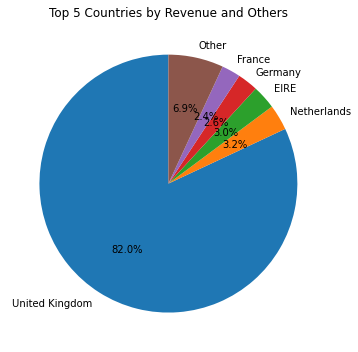

In [13]:
Top_country_by_revenue = df.groupby('Country')['Revenue'].sum()

top_5_countries = Top_country_by_revenue.nlargest(5)

# 3. Hitung total pendapatan dari semua negara di luar 5 teratas
other_revenue = Top_country_by_revenue.loc[~Top_country_by_revenue.index.isin(top_5_countries.index)].sum()

print(other_revenue)

# 4. Buat Series baru yang berisi 5 negara teratas dan 'Other'
top_5_and_other = pd.concat([top_5_countries, pd.Series([other_revenue], index=['Other'])])

print(top_5_and_other)

#print(top_5_and_other)

# 5. Buat pie chart dari Series baru ini
ax = top_5_and_other.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries by Revenue and Others')
plt.ylabel('')  # Hilangkan label 'Revenue' pada pie chart

plt.tight_layout()
plt.show()


In [14]:
top_3_countries = Top_country_by_revenue.index.tolist()
df_top_countries = df[df['Country'].isin(top_3_countries)]
grouped_data = df_top_countries.groupby(['Country', 'Description'])['Revenue'].sum()
top_3_products_per_country = grouped_data.groupby(level=0).nlargest(3)
top_3_products_by_eire = top_3_products_per_country['EIRE'].reset_index(level=0, drop=True)
top_3_products_by_uk = top_3_products_per_country['United Kingdom'].reset_index(level=0, drop=True)
top_3_products_by_nether = top_3_products_per_country['Netherlands'].reset_index(level=0, drop=True)

#print(df[df['Country'] == 'United Kingdom'].groupby('Description')['Revenue'].sum().nlargest(3))
#print(df_top_countries.loc[df_top_countries[df_top_countries['Country'] == 'United Kingdom']['Revenue'].idxmax(), 'Description'])
#print(df_top_countries[df_top_countries['Country'] == 'United Kingdom']['Revenue'].idxmax(), 'Description')
#print(top_3_products_per_country)
print(top_3_products_per_country )


Country         Country         Description                       
Australia       Australia       RABBIT NIGHT LIGHT                      3375.84
                                SET OF 6 SPICE TINS PANTRY DESIGN       2082.00
                                RED TOADSTOOL LED NIGHT LIGHT           1987.20
Austria         Austria         POSTAGE                                 1456.00
                                PACK OF 6 PANNETONE GIFT BOXES           302.40
                                                                        ...    
United Kingdom  United Kingdom  REGENCY CAKESTAND 3 TIER              110713.00
                                WHITE HANGING HEART T-LIGHT HOLDER     94805.50
Unspecified     Unspecified     JAM MAKING SET WITH JARS                  70.50
                                BISCUIT TIN VINTAGE CHRISTMAS             69.36
                                STORAGE TIN VINTAGE DOILY                 69.36
Name: Revenue, Length: 111, dtype: float64


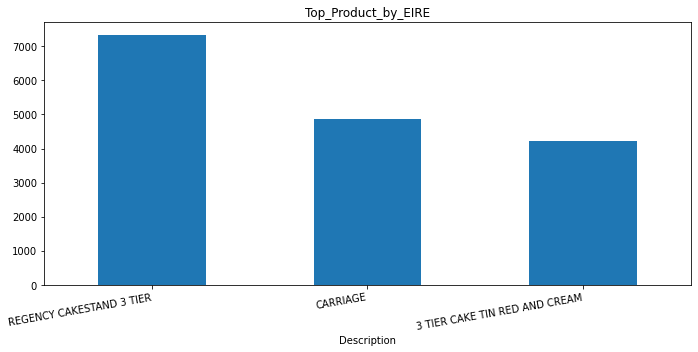

In [15]:
ax_eire = top_3_products_by_eire.plot(kind='bar', figsize=(10,5))
plt.title('Top_Product_by_EIRE')
for p in ax_eire.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()


Description
PAPER CRAFT , LITTLE BIRDIE           168469.6
REGENCY CAKESTAND 3 TIER              110713.0
WHITE HANGING HEART T-LIGHT HOLDER     94805.5
Name: Revenue, dtype: float64


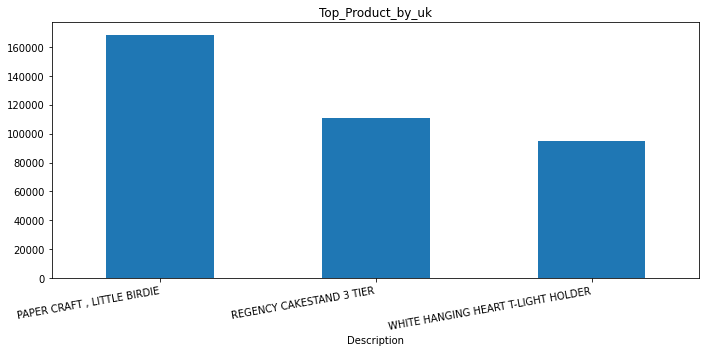

In [16]:
ax_uk = top_3_products_by_uk.plot(kind='bar', figsize=(10,5))

print(top_3_products_by_uk)
plt.title('Top_Product_by_uk')
for p in ax_uk.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()


Description
PAPER CRAFT , LITTLE BIRDIE           168469.6
REGENCY CAKESTAND 3 TIER              110713.0
WHITE HANGING HEART T-LIGHT HOLDER     94805.5
Name: Revenue, dtype: float64


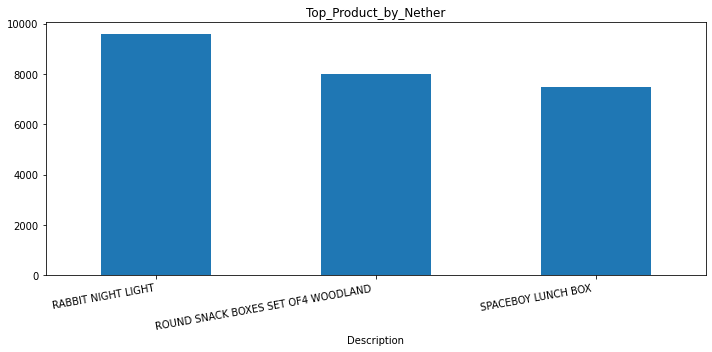

In [17]:
ax_nether = top_3_products_by_nether.plot(kind='bar', figsize=(10,5))

print(top_3_products_by_uk)
plt.title('Top_Product_by_Nether')
for p in ax_nether.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

2011-12-10 12:50:00
            Recency  Frequency  Monetary   R_Score   F_Score   M_Score
CustomerID                                                            
12346.0         326          1  77183.60  0.962425  0.000231  0.997925
12347.0           2          7   4310.00  0.021669  0.838866  0.923006
12348.0          75          4   1797.24  0.616644  0.653988  0.768787
12349.0          19          1   1757.55  0.259567  0.000461  0.763485
12350.0         310          1    334.40  0.946519  0.000692  0.286307
...             ...        ...       ...       ...       ...       ...
18280.0         278          1    180.60  0.919318  0.343937  0.131627
18281.0         181          1     80.82  0.802213  0.344168  0.023974
18282.0           8          2    178.05  0.134163  0.536653  0.127017
18283.0           4         16   2045.53  0.087367  0.965191  0.798755
18287.0          43          3   1837.28  0.463347  0.653757  0.774320

[4338 rows x 6 columns]
Jumlah Pelanggan per Segmen RFM:

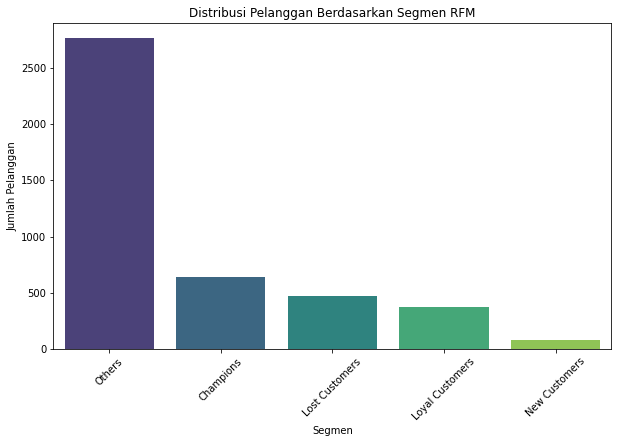

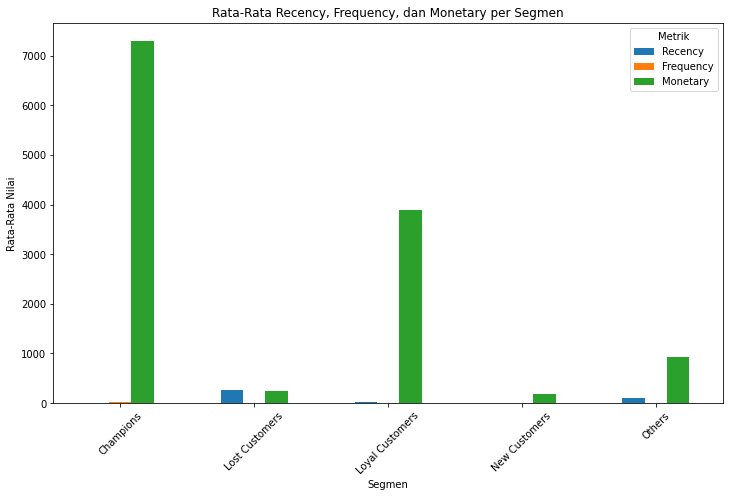

In [18]:
import numpy as np
import seaborn as sns


# Tentukan "hari ini" sebagai tanggal maksimum dalam dataset + 1 hari
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

print(snapshot_date)

# Kelompokkan data berdasarkan CustomerID dan hitung RFM
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique', # Frequency
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum() # Monetary
})

# Ganti nama kolom
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)


# Buat skor RFM
# Hitung nilai persentil (rank) untuk setiap kolom RFM
rfm_df['R_Score'] = rfm_df['Recency'].rank(method='first', pct=True)
rfm_df['F_Score'] = rfm_df['Frequency'].rank(method='first', pct=True)
rfm_df['M_Score'] = rfm_df['Monetary'].rank(method='first', pct=True)

print(rfm_df)

# Beri skor 1 sampai 4 berdasarkan persentil
rfm_df['R_Score'] = np.where(rfm_df['R_Score'] <= 0.25, 4,
                            np.where(rfm_df['R_Score'] <= 0.50, 3,
                                     np.where(rfm_df['R_Score'] <= 0.75, 2, 1)))

rfm_df['F_Score'] = np.where(rfm_df['F_Score'] <= 0.25, 1,
                            np.where(rfm_df['F_Score'] <= 0.50, 2,
                                     np.where(rfm_df['F_Score'] <= 0.75, 3, 4)))

rfm_df['M_Score'] = np.where(rfm_df['M_Score'] <= 0.25, 1,
                            np.where(rfm_df['M_Score'] <= 0.50, 2,
                                     np.where(rfm_df['M_Score'] <= 0.75, 3, 4)))

# Gabungkan skor untuk mendapatkan RFM_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def rfm_segment(rfm_score):
    if rfm_score in ['444', '434', '443']:
        return 'Champions'
    elif rfm_score in ['421', '411']:
        return 'New Customers'
    elif rfm_score in ['334', '344', '343']:
        return 'Loyal Customers'
    # Tambahkan segmen lain sesuai kebutuhan
    elif rfm_score in ['111', '112']:
        return 'Lost Customers'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Lihat jumlah pelanggan di setiap segmen
segment_counts = rfm_df['Segment'].value_counts()
print("Jumlah Pelanggan per Segmen RFM:")
print(segment_counts)

# Hitung rata-rata Recency, Frequency, dan Monetary per segmen
segment_metrics = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print("\nRata-rata RFM per Segmen:")
print(segment_metrics)

# Grafik batang untuk jumlah pelanggan per segmen
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='Segment', hue='Segment', palette='viridis', order=rfm_df['Segment'].value_counts().index, legend=False)
plt.title('Distribusi Pelanggan Berdasarkan Segmen RFM')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

# Grafik untuk membandingkan rata-rata RFM per segmen
segment_metrics = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

segment_metrics.plot(kind='bar', figsize=(12, 7))
plt.title('Rata-Rata Recency, Frequency, dan Monetary per Segmen')
plt.xlabel('Segmen')
plt.ylabel('Rata-Rata Nilai')
plt.xticks(rotation=45)
plt.legend(title='Metrik')
plt.show()

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


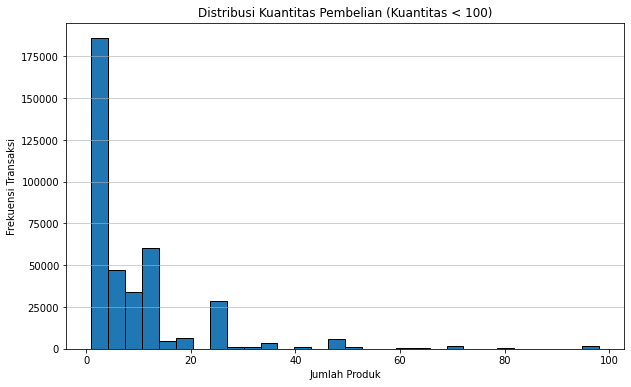

In [31]:
print(df['Quantity'].describe())

df_filtered = df[df['Quantity'] < 100]

# Buat histogram dari data yang sudah difilter
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Quantity'], bins=30, edgecolor='black')
plt.title('Distribusi Kuantitas Pembelian (Kuantitas < 100)')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi Transaksi')
plt.grid(axis='y', alpha=0.75)
plt.show()

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


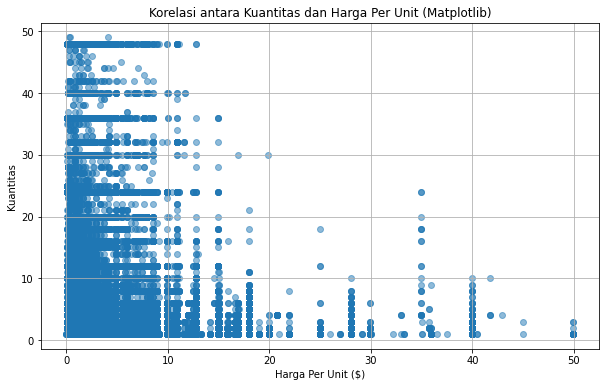

In [20]:
print(df['Quantity'].describe())
print(df['UnitPrice'].describe())


# Hapus outlier untuk visualisasi yang lebih jelas
df_clean = df[(df['Quantity'] < 50) & (df['UnitPrice'] < 50)]

plt.figure(figsize=(10, 6))

# Buat scatter plot
plt.scatter(x=df_clean['UnitPrice'], y=df_clean['Quantity'], alpha=0.5)

# Tambahkan judul dan label
plt.title('Korelasi antara Kuantitas dan Harga Per Unit (Matplotlib)')
plt.xlabel('Harga Per Unit ($)')
plt.ylabel('Kuantitas')
plt.grid(True)

plt.show()

Matriks Korelasi:
           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.004578  0.914451
UnitPrice -0.004578   1.000000  0.081619
Revenue    0.914451   0.081619  1.000000


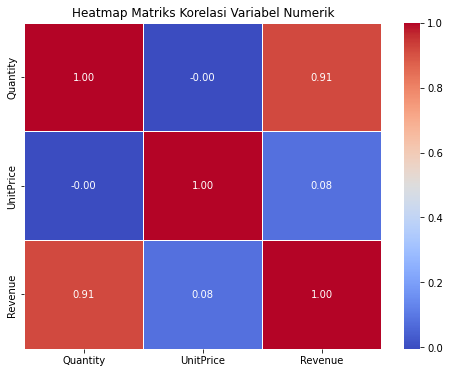

In [38]:
kolom_analisis = ['Quantity', 'UnitPrice', 'Revenue']
df_analisis = df[kolom_analisis]

matriks_korelasi = df_analisis.corr()
print("Matriks Korelasi:")
print(matriks_korelasi)

plt.figure(figsize=(8, 6))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Variabel Numerik')
plt.show()
